In [2]:
import pandas as pd
import mne as mne
import os 
import time
import numpy as np
import matplotlib.pyplot as plt
import joblib
import constants
from IPython.utils import io
import time
import sys
import yasa
from scipy.signal import welch

#Import my modules
import format_eeg_data
import constants
import eeg_stat_ts

#Ignore warnings for now 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/export/sphere/ebirah/ko20929/miniconda3/envs/sktime_latest/lib/python3.11/site-packages/antropy/fractal.py:197: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit((types.Array(types.float64, 1, "C", readonly=True), types.int32))


In [ ]:
'/user/work/ko20929/fif_files/'

In [51]:
paths = [path.replace('/export/sphere/ebirah/ko20929/RBD_files/All_data', '/user/work/ko20929/fif_files' ) for path in paths]

In [ ]:
#Let's time 1 dataframe transformation
t1 = time.time()

channels = constants.channel_list
paths_with_errors = []
paths , class_list, sleep_night_list , sleep_type_list , participant_id_list = constants.generate_paths_and_info()

df_list = []

path = paths[0]

with io.capture_output() as captured:
    for path in paths:
        if 'N2' in path:
            try:
                data_epo = mne.read_epochs(path)
                data = data_epo._data * 1e6  # convert signal from V to uV
                df_full = data_epo.to_data_frame()
                df = df_full[channels].copy()
                df_list.append(df)

            except:
                pass

print('done loading the data .....')

t2 = time.time()

print(t2-t1)

In [4]:
df_list

[]

In [2]:
#Let's time 1 dataframe transformation
t1 = time.time()

channels = constants.channel_list
paths_with_errors = []
paths , class_list, sleep_night_list , sleep_type_list , participant_id_list = constants.generate_paths_and_info()

paths = [path.replace('/export/sphere/ebirah/ko20929/RBD_files/All_data', '/user/work/ko20929/fif_files' ) for path in paths]

df_list = []

path = paths[0]

with io.capture_output() as captured:
    for path in paths[:30]:
        try:
            data_epo = mne.read_epochs(path)
            data = data_epo._data * 1e6  # convert signal from V to uV
            df_full = data_epo.to_data_frame()
            df = df_full[channels].copy()
            df_list.append(df)
        
        except:
            pass
print('done loading the data .....')
        
ts_row_list = []

for df in df_list:
    #1.Generate the window indices 
    window_indices = eeg_stat_ts.gen_window_indices(6, df , samp_freq = 256)
    #2. Calculate bpw vals per window
    bpw_per_win_df = eeg_stat_ts.gen_statistic_per_window(df , window_indices , stat = 'bpw')
    #3. Convert bpw per window per channel into bpw per window per region
    regional_df = eeg_stat_ts.convert_chan_stats_to_region(bpw_per_win_df, constants.channel_list , constants.region_to_channel_dict)
    #4. Convert into a single row of a new dataframe where each cell is a series
    new_row = eeg_stat_ts.dataframe_to_ts_row(regional_df, list(regional_df.columns[:-1]) )
    ts_row_list.append(new_row)
    
ts_df = pd.DataFrame.from_records(ts_row_list)    
    
t2 = time.time()

print(t2-t1)

done loading the data .....
0.009105682373046875


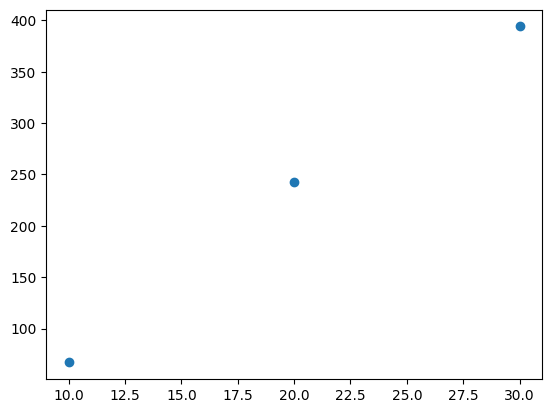

In [48]:
plt.scatter([10,20,30], [67,243,394])

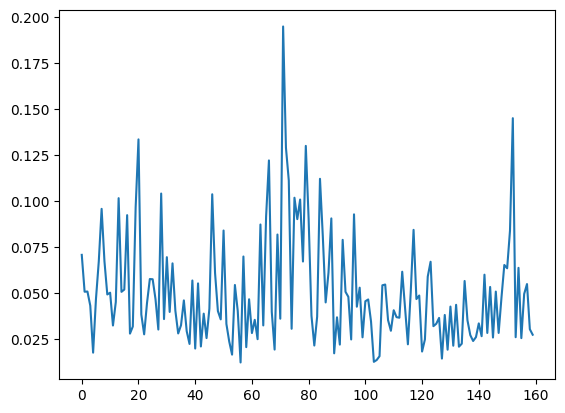

In [38]:
plt.plot(ts_df.iloc[9,10] )

In [16]:
ts_df

,Delta_Central,Theta_Central,Alpha_Central,Sigma_Central,Beta_Central,Gamma_Central,TotalAbsPow_Central,Delta_Frontal,Theta_Frontal,Alpha_Frontal,...,Beta_Right Parietal,Gamma_Right Parietal,TotalAbsPow_Right Parietal,Delta_Right Temporal,Theta_Right Temporal,Alpha_Right Temporal,Sigma_Right Temporal,Beta_Right Temporal,Gamma_Right Temporal,TotalAbsPow_Right Temporal
0,0 0.109404 1 0.128268 2 0.388450 3...,0 0.528768 1 0.357538 2 0.256406 3...,0 0.139484 1 0.247070 2 0.098152 3...,0 0.069121 1 0.071003 2 0.045401 3...,0 0.137460 1 0.169332 2 0.113092 3...,0 0.015763 1 0.026789 2 0.098499 3...,0 56.478214 1 35.491996 2 25.14322...,0 0.057787 1 0.099344 2 0.314825 3...,0 0.624778 1 0.270435 2 0.218789 3...,0 0.148776 1 0.266792 2 0.101929 3...,...,0 0.085209 1 0.137645 2 0.134379 3...,0 0.029426 1 0.039926 2 0.145236 3...,0 57.729249 1 34.627984 2 25.32113...,0 0.103704 1 0.129549 2 0.287141 3...,0 0.683575 1 0.566254 2 0.372443 3...,0 0.102381 1 0.173220 2 0.125083 3...,0 0.037748 1 0.047110 2 0.061926 3...,0 0.061342 1 0.070038 2 0.105391 3...,0 0.011249 1 0.013828 2 0.048015 3...,0 65.601458 1 46.966847 2 25.92...
1,0 0.487961 1 0.513028 2 0.41743...,0 0.204534 1 0.229183 2 0.18735...,0 0.089127 1 0.091638 2 0.16003...,0 0.080856 1 0.043851 2 0.12412...,0 0.089909 1 0.067905 2 0.08693...,0 0.047613 1 0.054395 2 0.02411...,0 31.064161 1 29.851078 2 45.76...,0 0.299064 1 0.581558 2 0.39285...,0 0.259340 1 0.159057 2 0.16349...,0 0.127026 1 0.121314 2 0.21416...,...,0 0.099373 1 0.050084 2 0.05504...,0 0.041899 1 0.037931 2 0.03017...,0 23.587317 1 38.728508 2 40.68...,0 0.506494 1 0.585346 2 0.49502...,0 0.276572 1 0.264993 2 0.24796...,0 0.072390 1 0.067741 2 0.14658...,0 0.046496 1 0.027221 2 0.05180...,0 0.070075 1 0.035486 2 0.04436...,0 0.027973 1 0.019213 2 0.01425...,0 29.755169 1 46.982852 2 48.13...
2,0 0.775165 1 0.793421 2 0.89376...,0 0.115710 1 0.128891 2 0.04331...,0 0.062931 1 0.035619 2 0.02343...,0 0.023167 1 0.012441 2 0.02963...,0 0.015686 1 0.015985 2 0.00609...,0 0.007340 1 0.013643 2 0.00376...,0 59.441930 1 60.360683 2 144...,0 0.767028 1 0.670261 2 0.85914...,0 0.110179 1 0.173989 2 0.06019...,0 0.096901 1 0.085771 2 0.05601...,...,0 0.011531 1 0.013875 2 0.00788...,0 0.005352 1 0.008888 2 0.00363...,0 67.756999 1 48.069943 2 101...,0 0.790974 1 0.909932 2 0.87257...,0 0.113809 1 0.054460 2 0.06132...,0 0.061101 1 0.021832 2 0.03184...,0 0.016245 1 0.004009 2 0.02585...,0 0.011680 1 0.005633 2 0.00607...,0 0.006190 1 0.004134 2 0.00234...,0 58.649493 1 172.735428 2 123...
3,0 0.534534 1 0.387710 2 0.42522...,0 0.293270 1 0.424379 2 0.26447...,0 0.086945 1 0.067723 2 0.11175...,0 0.039545 1 0.053726 2 0.10141...,0 0.034052 1 0.051924 2 0.08084...,0 0.011654 1 0.014538 2 0.01627...,0 42.921243 1 44.265962 2 26.27...,0 0.562205 1 0.224364 2 0.28685...,0 0.234471 1 0.525861 2 0.33281...,0 0.124148 1 0.073444 2 0.16759...,...,0 0.027003 1 0.075496 2 0.06372...,0 0.011182 1 0.026845 2 0.01297...,0 37.848887 1 25.030353 2 22.94...,0 0.582064 1 0.477176 2 0.29809...,0 0.245039 1 0.323402 2 0.44408...,0 0.099080 1 0.070844 2 0.11044...,0 0.037039 1 0.052024 2 0.08463...,0 0.028650 1 0.064638 2 0.05576...,0 0.008128 1 0.011917 2 0.00697...,0 31.929320 1 25.144897 2 28.06...
4,0 0.410156 1 0.084750 2 0.130967 3...,0 0.191052 1 0.303427 2 0.515542 3...,0 0.095865 1 0.285107 2 0.145799 3...,0 0.078800 1 0.200577 2 0.070714 3...,0 0.119081 1 0.116503 2 0.122766 3...,0 0.105046 1 0.009636 2 0.014211 3...,0 33.427454 1 82.181849 2 61.23712...,0 0.432127 1 0.046141 2 0.073484 3...,0 0.160412 1 0.429877 2 0.659885 3...,0 0.077179 1 0.310782 2 0.100654 3...,...,0 0.079292 1 0.066283 2 0.092278 3...,0 0.054259 1 0.008816 2 0.009735 3...,0 27.420742 1 89.509303 2 73.49035...,0 0.563288 1 0.122460 2 0.239900 3...,0 0.149562 1 0.318702 2 0.474626 3...,0 0.133719 1 0.259901 2 0.101919 3...,0 0.046306 1 0.187723 2 0.081428 3...,0 0.066633 1 0.094749 2 0.086383 3...,0 0.040492 1 0.016465 2 0.015744 3...,0 30.419358 1 52.505531 2 

In [13]:
constants.region_to_channel_dict

{'Prefrontal': ['Fp1', 'Fpz', 'Fp2'],
 'Frontal': ['F1', 'Fz', 'F2'],
 'Left Frontal': ['AF7', 'F7', 'F5', 'F3'],
 'Right Frontal': ['AF8', 'F8', 'F6', 'F4'],
 'Central': ['FCz', 'FC1', 'FC2', 'Cz', 'C1', 'C2', 'CP1', 'CP2'],
 'Left Central': ['FC5', 'FC3', 'C5', 'C3', 'CP5', 'CP3'],
 'Right Central': ['FC6', 'FC4', 'C6', 'C4', 'CP6', 'CP4'],
 'Left Temporal': ['TP7', 'T7', 'FT7', 'FT9'],
 'Right Temporal': ['TP8', 'T8', 'FT8', 'FT10'],
 'Parietal': ['P1', 'P2', 'Pz'],
 'Left Parietal': ['P3', 'P5', 'P7', 'PO7'],
 'Right Parietal': ['P4', 'P6', 'P8', 'PO8'],
 'Occipital': ['POz', 'O1', 'O2', 'Oz']}

In [14]:
ts_df.columns

Index(['Delta_Central', 'Theta_Central', 'Alpha_Central', 'Sigma_Central',
       'Beta_Central', 'Gamma_Central', 'TotalAbsPow_Central', 'Delta_Frontal',
       'Theta_Frontal', 'Alpha_Frontal', 'Sigma_Frontal', 'Beta_Frontal',
       'Gamma_Frontal', 'TotalAbsPow_Frontal', 'Delta_Left Central',
       'Theta_Left Central', 'Alpha_Left Central', 'Sigma_Left Central',
       'Beta_Left Central', 'Gamma_Left Central', 'TotalAbsPow_Left Central',
       'Delta_Left Frontal', 'Theta_Left Frontal', 'Alpha_Left Frontal',
       'Sigma_Left Frontal', 'Beta_Left Frontal', 'Gamma_Left Frontal',
       'TotalAbsPow_Left Frontal', 'Delta_Left Parietal',
       'Theta_Left Parietal', 'Alpha_Left Parietal', 'Sigma_Left Parietal',
       'Beta_Left Parietal', 'Gamma_Left Parietal',
       'TotalAbsPow_Left Parietal', 'Delta_Left Temporal',
       'Theta_Left Temporal', 'Alpha_Left Temporal', 'Sigma_Left Temporal',
       'Beta_Left Temporal', 'Gamma_Left Temporal',
       'TotalAbsPow_Left Temporal

In [9]:
df

,Fp1,Fpz,Fp2,F1,Fz,F2,AF7,F7,F5,F3,...,P7,PO7,P4,P6,P8,PO8,POz,O1,O2,Oz
0,1.116644,0.315412,-2.391638,-4.208709,-11.945421,-8.493974,-3.467580,-8.706887,-5.582644,-7.438055,...,4.581222,-0.720770,6.961616,5.688397,3.977597,1.512183,4.423805,0.459171,4.933430,3.640409
1,-0.469489,-0.245459,-3.345754,-2.183850,-9.067243,-6.083340,-4.478872,-9.669749,-5.736967,-6.667561,...,1.881732,-1.716714,7.009744,5.361204,2.111938,-0.197152,3.318316,-1.029980,2.715833,1.880714
2,0.253375,1.061336,-2.825452,1.177248,-4.851231,-2.088200,-3.308642,-8.842796,-3.036384,-3.605622,...,-2.143544,-1.848537,4.852696,3.618188,-1.612881,-3.134845,0.608070,-3.759593,-1.399216,-0.797467
3,3.806369,4.625994,0.007140,4.840417,-0.205977,2.494518,-0.084053,-5.959976,1.442142,0.751531,...,-5.942044,-2.478843,1.308307,0.848377,-5.524947,-6.465273,-2.525532,-6.671330,-5.091083,-3.852566
4,9.193107,9.800885,4.919589,7.736366,3.867104,6.400224,4.155365,-2.160593,5.608819,4.956121,...,-7.913000,-4.329993,-2.285469,-2.104871,-8.063161,-9.225382,-4.970602,-8.608203,-6.536908,-6.502856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84475,-2.061656,3.571330,3.756992,2.054655,2.641312,7.594723,0.958329,-0.953964,-0.963269,2.434045,...,-9.624197,-7.079671,0.324989,-3.271004,-2.520360,-6.294730,-4.867808,-5.803115,-2.874383,-3.426108
84476,-1.585033,4.355899,4.068717,0.510427,1.471665,6.004473,0.761064,-1.269892,-2.266085,1.153259,...,-8.022438,-4.125729,0.228033,-1.525489,-3.329849,-5.709895,-3.074698,-3.715189,-2.029557,-1.709023
84477,-2.740979,3.114209,2.419311,-2.646151,-1.406355,2.670665,-0.548109,-1.884377,-3.747429,-1.283643,...,-5.034653,0.588012,0.770758,-0.424025,-3.025129,-3.844942,0.098989,0.034353,-0.261879,1.175315
84478,-4.969822,0.500801,-0.434464,-6.007011,-4.866809,-0.890589,-2.183652,-1.983547,-4.442028,-3.574043,...,-1.238687,4.586385,1.874623,-1.947019,-1.885333,-2.056289,3.606158,4.047972,1.833641,4.359625


In [15]:
#This Cell takes 2-3 mins to run
channels = constants.channel_list

paths_with_errors = []

paths , class_list, sleep_night_list , sleep_type_list , participant_id_list = constants.generate_paths_and_info()

#1. select the appropriate paths and supplementary information - store in lists

# for data_type in ['Wake', 'N1', 'N2', 'N3','REM']

for data_type in ['N2', 'N3','REM']:   
    
    t1 = time.time()
    
    selected_paths , s_class_list , s_night_list , s_sleep_type , s_p_id = [], [], [], [], []

    for path , class_name, night , p_id in zip(paths, class_list, sleep_night_list, participant_id_list ):
        if data_type in path:
            selected_paths.append(path) 
            s_class_list.append(class_name)
            s_night_list.append(night)
            s_sleep_type.append(data_type)
            s_p_id.append(p_id)

    #2. Load corresponding data into dataframes , store in dataframe list
    df_list = []
    with io.capture_output() as captured:
        for path in selected_paths:
            try:
                data_epo = mne.read_epochs(path)
                data = data_epo._data * 1e6  # convert signal from V to uV
                df_full = data_epo.to_data_frame()
                df = df_full[channels].copy()
                df_list.append(df)
            except:
                paths_with_errors.append(path)

    #Now we have the 57 channel EEG data in df's in df_list and corresponding supplementary information in the lists 
    #Selected_paths , s_class_list , s_night_list , s_sleep_type , s_p_id

    #Convert each dataframe of raw chanel EEG data into a single row of TS data , with bpw statistics calculated per region
    # Store each row in ts_row_list
    ts_row_list = []

    for df in df_list:
        #1.Generate the window indices 
        window_indices = eeg_stat_ts.gen_window_indices(6, df , samp_freq = 256)
        #2. Calculate bpw vals per window
        bpw_per_win_df = eeg_stat_ts.gen_statistic_per_window(df , window_indices , stat = 'bpw')
        #3. Convert bpw per window per channel into bpw per window per region
        regional_df = eeg_stat_ts.convert_chan_stats_to_region(bpw_per_win_df, constants.channel_list , constants.region_to_channel_dict)
        #4. Convert into a single row of a new dataframe where each cell is a series
        new_row = eeg_stat_ts.dataframe_to_ts_row(regional_df, list(regional_df.columns[:-1]) )
        ts_row_list.append(new_row)
        
    # Save everything in the appropriate place ---->  final_transformed_df, groups , y
    folder = 'new_freq_ts/'
    
    ts_df = pd.DataFrame.from_records(ts_row_list)
    groups = pd.Series(s_p_id)
    s_class_list = pd.Series(s_class_list)
    y = s_class_list.map({'HC': 0 , 'PD' : 1 , 'PD+RBD' : 2 , 'RBD' : 3})

    ts_df.to_hdf(folder + data_type + 'six_second_freq_df.h5' , key = 'df', mode = 'w')
    groups.to_hdf(folder + data_type + '_groups.h5' , key = 'df', mode = 'w')
    y.to_hdf(folder + data_type + '_y.h5' , key = 'df', mode = 'w')
    print('Done for ' + data_type + ' !....')
    
    t2 = time.time()
    
    print(t2 - t1)

KeyboardInterrupt: 

In [ ]:
# If there are paths with errros for a sleep type , then the groups and y will be incorrect - I should correct for this! 